# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


## Sumber Dataset
[Energy Efficiency Data Set](https://www.kaggle.com/datasets/ujjwalchowdhury/energy-efficiency-data-set).


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [3]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [19]:
energy_efficiency = pd.read_csv('energy_efficiency_data.csv')
energy_efficiency.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [5]:
energy_efficiency.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative_Compactness       768 non-null    float64
 1   Surface_Area               768 non-null    float64
 2   Wall_Area                  768 non-null    float64
 3   Roof_Area                  768 non-null    float64
 4   Overall_Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing_Area               768 non-null    float64
 7   Glazing_Area_Distribution  768 non-null    int64  
 8   Heating_Load               768 non-null    float64
 9   Cooling_Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [6]:
energy_efficiency.describe(include='all')

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [7]:
energy_efficiency.shape

(768, 10)

In [8]:
# Check for missing values
print("Missing Values:")
print(energy_efficiency.isnull().sum())

Missing Values:
Relative_Compactness         0
Surface_Area                 0
Wall_Area                    0
Roof_Area                    0
Overall_Height               0
Orientation                  0
Glazing_Area                 0
Glazing_Area_Distribution    0
Heating_Load                 0
Cooling_Load                 0
dtype: int64


tidak terdapat missing value dalam dataset

In [9]:
# Check for duplicates
print("Duplicates:")
print(energy_efficiency.duplicated().sum())

Duplicates:
0


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

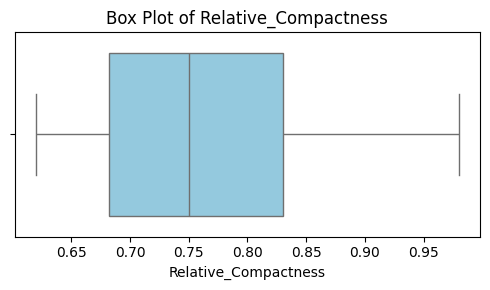

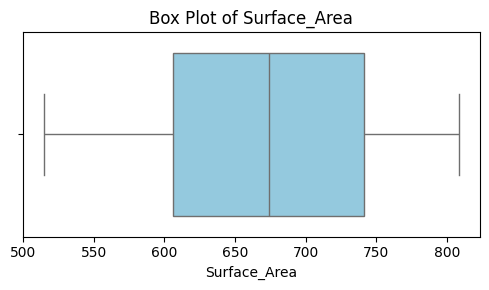

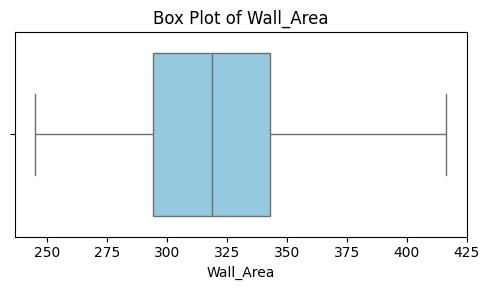

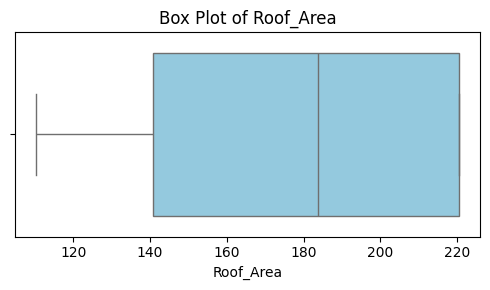

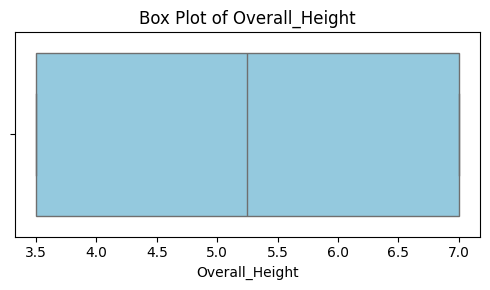

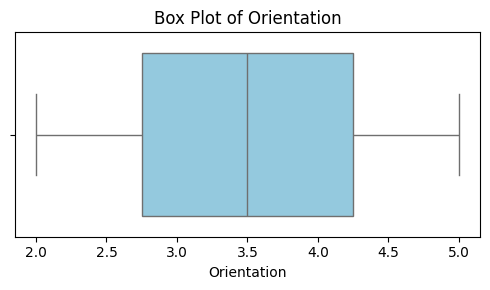

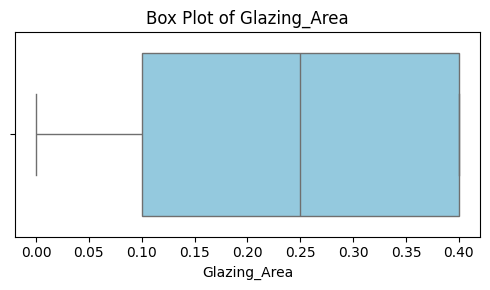

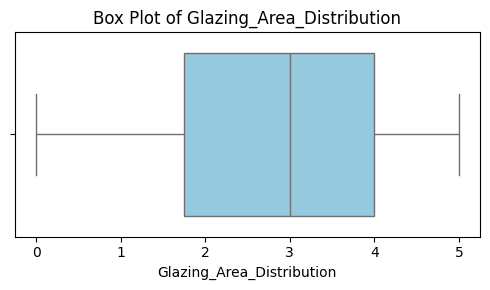

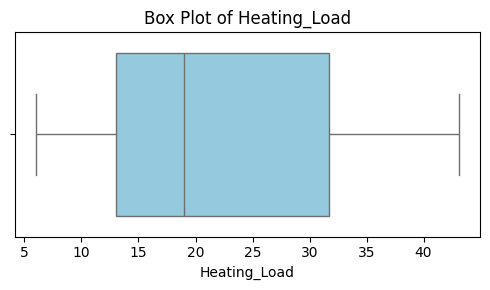

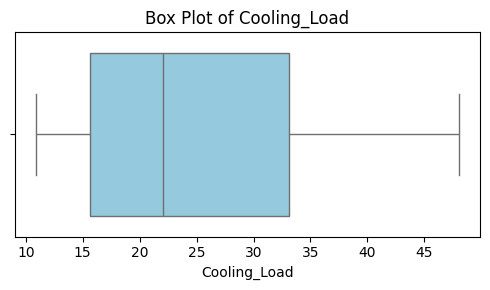

In [10]:
def plot_boxplots(df):
    """
    Menampilkan boxplot untuk semua fitur numerik dalam DataFrame.
    """
    numeric_features = df.select_dtypes(include=np.number).columns.tolist()

    for feature in numeric_features:
        plt.figure(figsize=(5, 3))
        sns.boxplot(x=df[feature], color='skyblue')
        plt.title(f'Box Plot of {feature}')
        plt.xlabel(feature)
        plt.tight_layout()
        plt.show()

plot_boxplots(energy_efficiency)


tidak terdapat outlier pada dataset

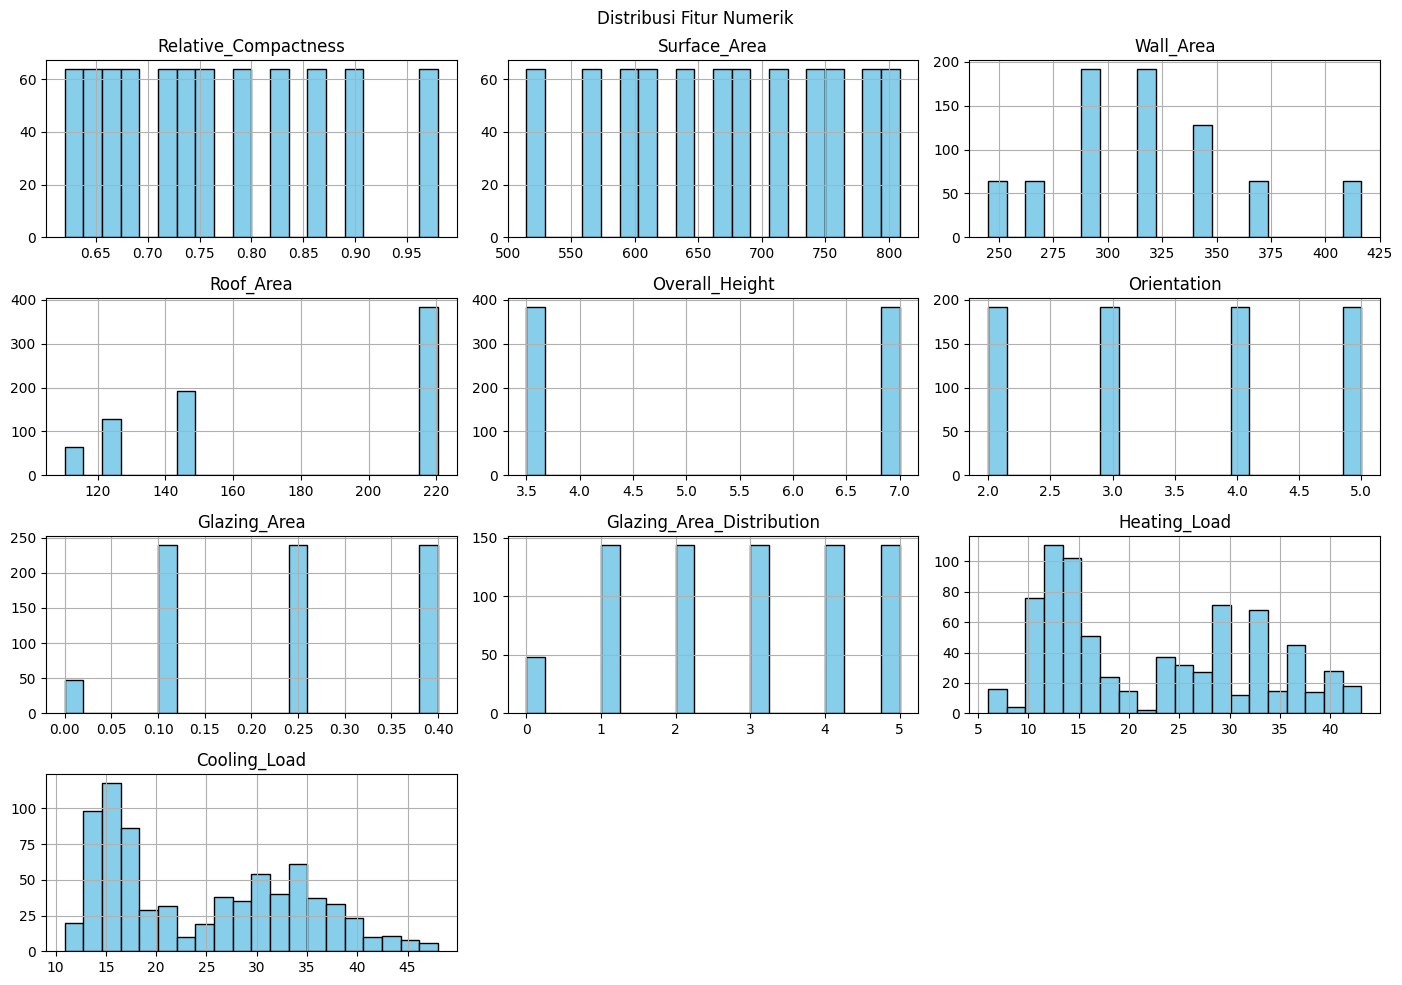

In [11]:
# Distribution of each feature
energy_efficiency.hist(bins=20, figsize=(14, 10), color='skyblue', edgecolor='black')
plt.suptitle('Distribusi Fitur Numerik')
plt.tight_layout()
plt.show()

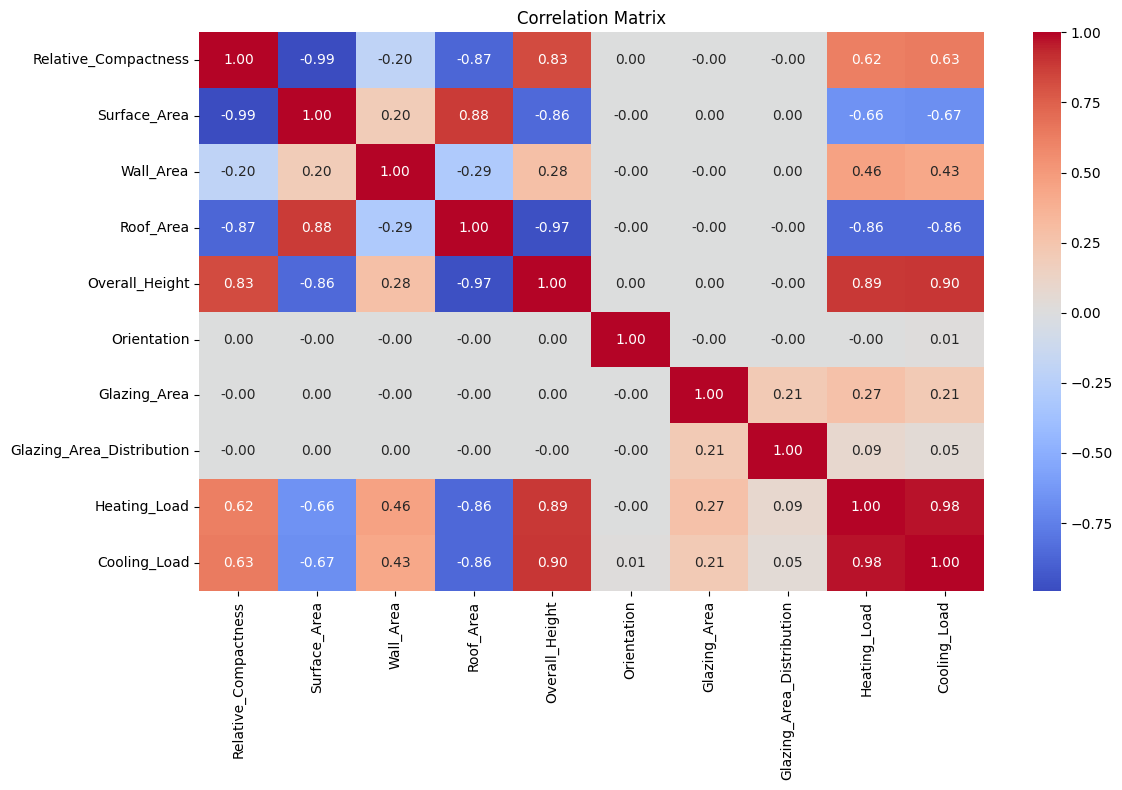

In [12]:
plt.figure(figsize=(12, 8))
sns.heatmap(energy_efficiency.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

Insight Korelasi:
1. Target variables:

- Heating_Load dan Cooling_Load memiliki korelasi sangat tinggi satu sama lain (0.98), artinya mereka sangat mirip secara pola.

2. Fitur dengan korelasi tinggi terhadap target:

- Overall_Height → positif tinggi ke Heating & Cooling (0.89 & 0.90)

- Roof_Area → negatif tinggi (-0.86 ke keduanya)

- Surface_Area dan Relative_Compactness → korelasi sedang.

3. Fitur dengan pengaruh rendah:

- Orientation, Glazing_Area, Glazing_Area_Distribution → korelasi mendekati nol (tidak signifikan).

Pairplot:


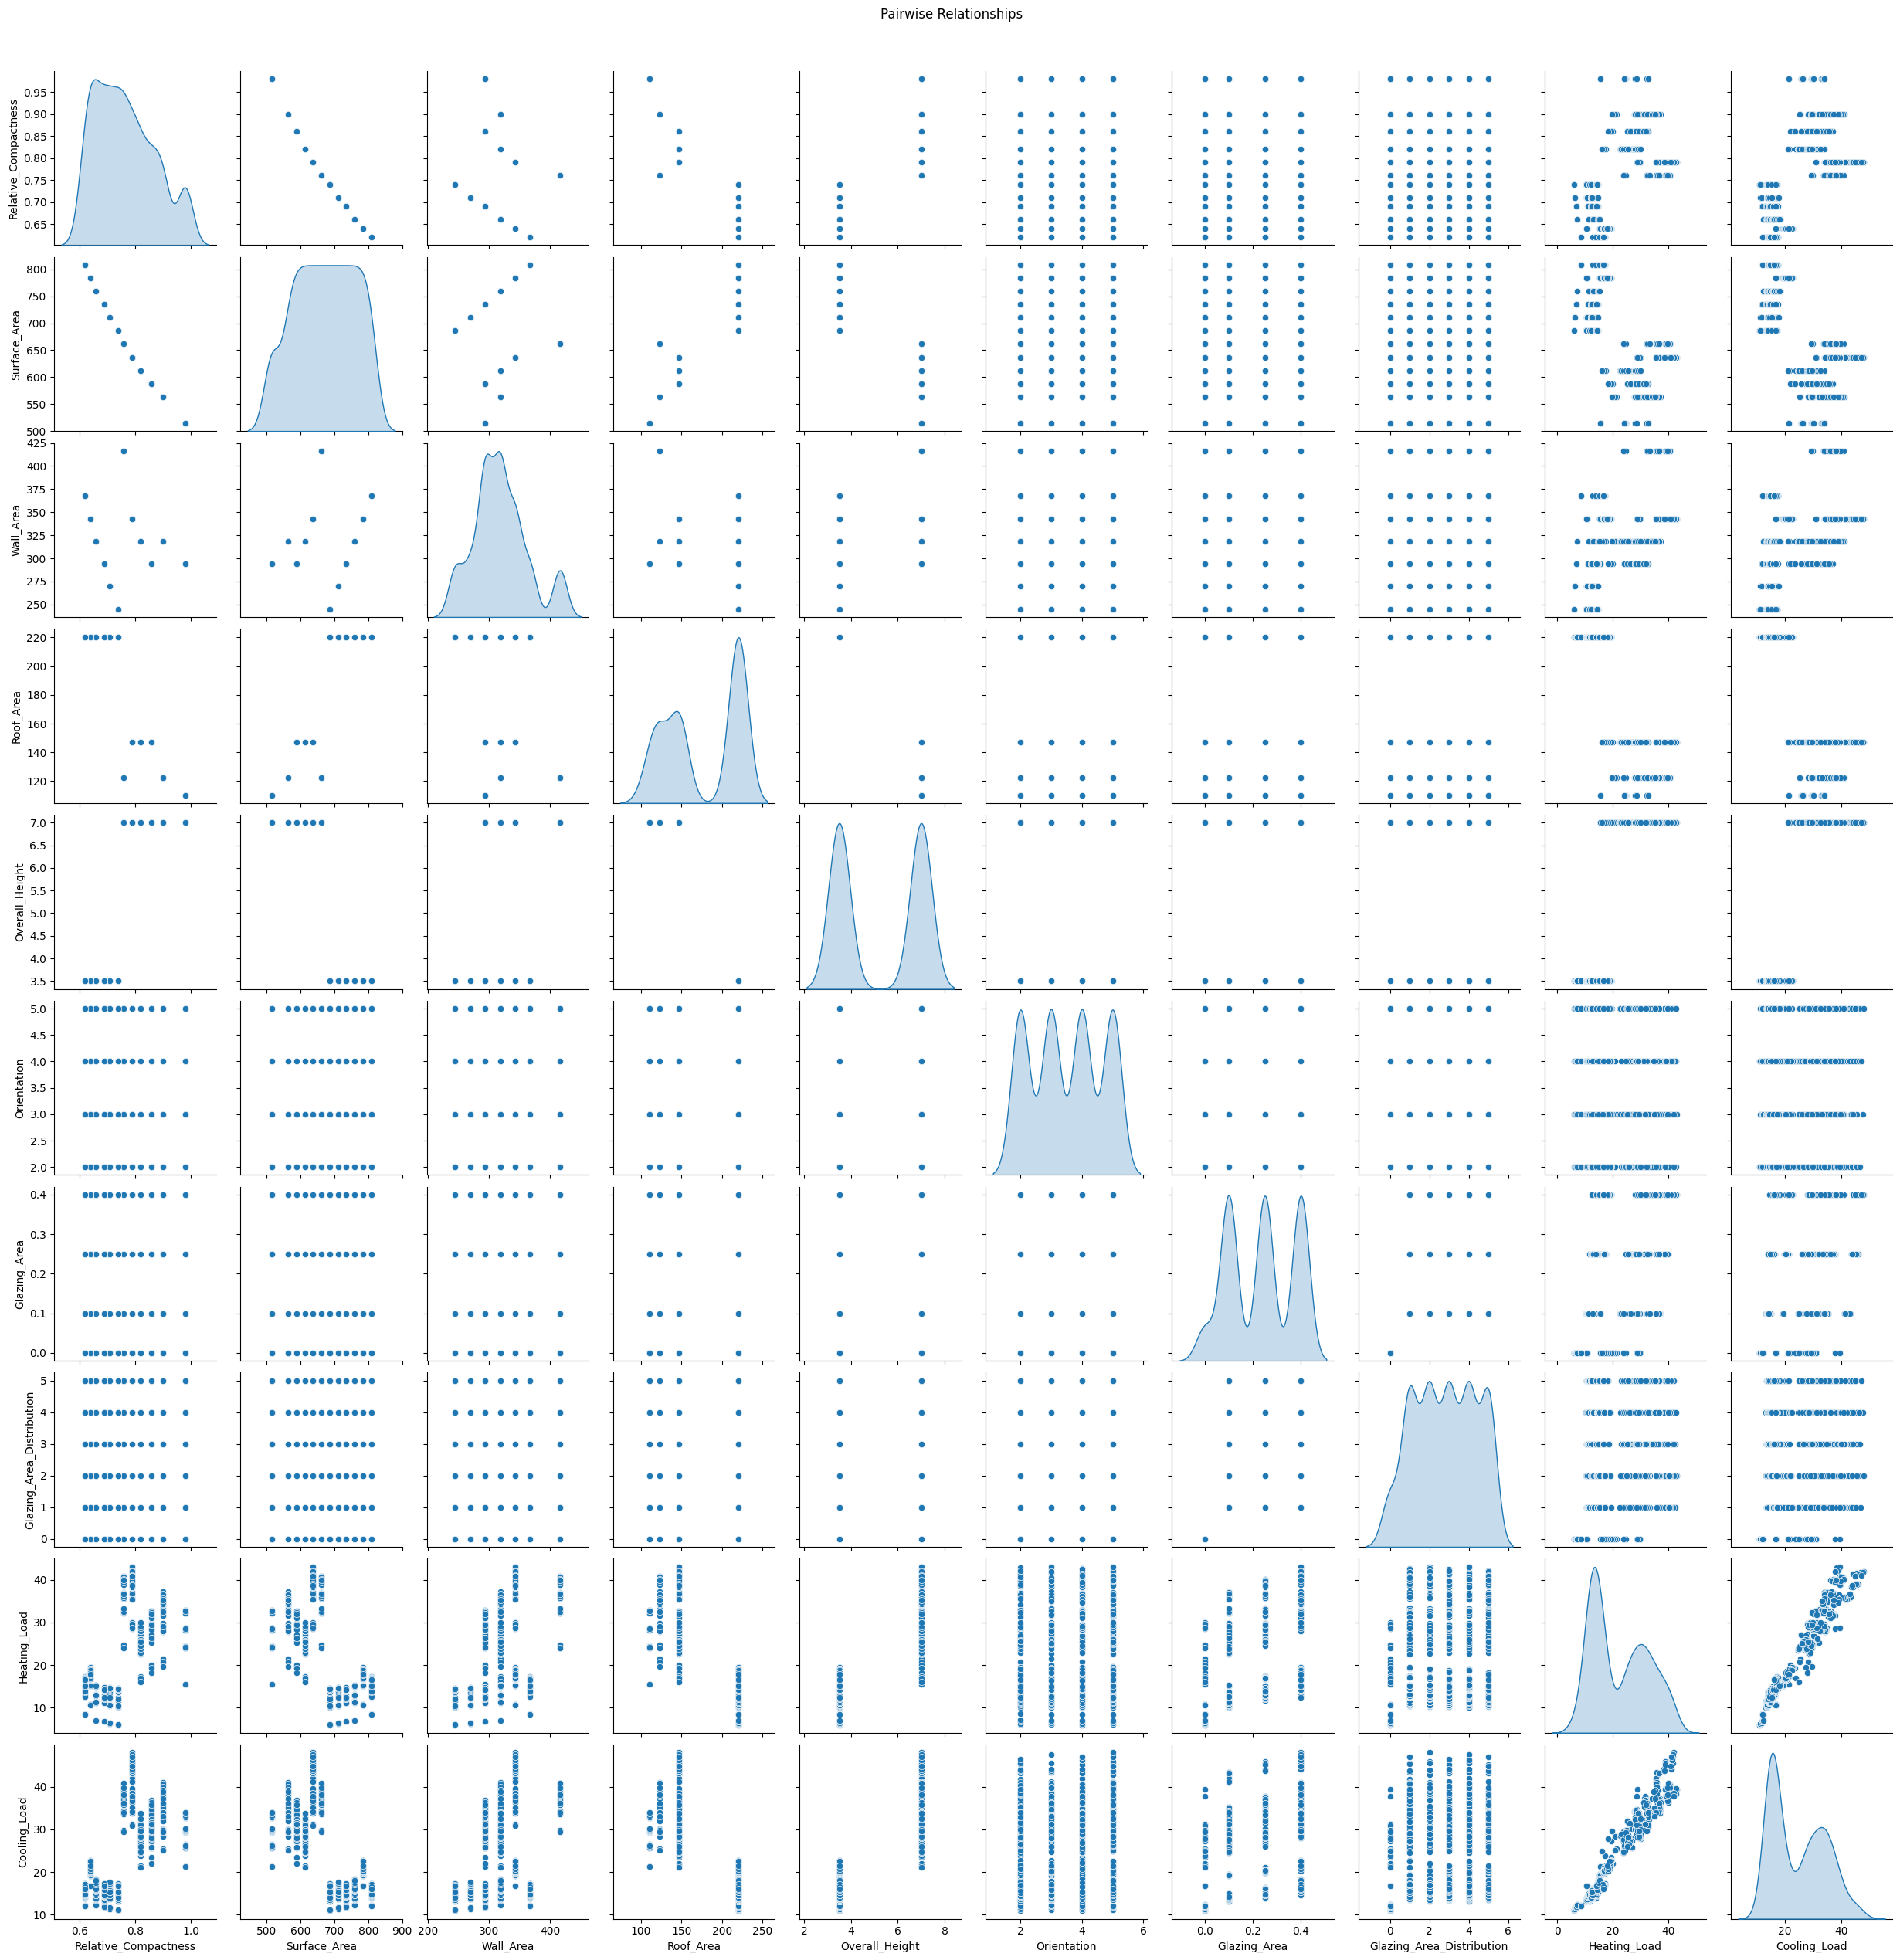

In [13]:
# Pairplot to explore pairwise relationships
print("Pairplot:")
sns.pairplot(energy_efficiency, diag_kind='kde')
plt.suptitle("Pairwise Relationships", y=1.02)
plt.show()

In [14]:
# Fitur (8 kolom pertama)
X = energy_efficiency[[
    'Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area',
    'Overall_Height', 'Orientation', 'Glazing_Area', 'Glazing_Area_Distribution'
]]

# Target (dua output)
y = energy_efficiency[['Heating_Load', 'Cooling_Load']]


In [21]:
# Split the dataset into training and testing sets and save them to CSV files
train_df, test_df = train_test_split(energy_efficiency, test_size=0.2, random_state=42)

train_df.to_csv("train_data.csv", index=False)
test_df.to_csv("test_data.csv", index=False)

print("Data split and saved to 'train_data.csv' and 'test_data.csv'")

Data split and saved to 'train_data.csv' and 'test_data.csv'
